In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('download.csv')

In [3]:
df.head(3)
df.replace('NA', np.nan, inplace=True)
df.fillna(0)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,10/09/2020,10,9,2020,24,2,Afghanistan,AF,AFG,38041757.0,Asia,1.098793
1,09/09/2020,9,9,2020,26,3,Afghanistan,AF,AFG,38041757.0,Asia,1.180282
2,08/09/2020,8,9,2020,96,3,Afghanistan,AF,AFG,38041757.0,Asia,1.114565
3,07/09/2020,7,9,2020,74,2,Afghanistan,AF,AFG,38041757.0,Asia,1.048847
4,06/09/2020,6,9,2020,20,0,Afghanistan,AF,AFG,38041757.0,Asia,0.854324
...,...,...,...,...,...,...,...,...,...,...,...,...
41832,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.000000
41833,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.000000
41834,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.000000
41835,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.000000


In [4]:
df.rename(columns={'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000': 'densityPop'}, inplace=True)

In [5]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,densityPop
0,10/09/2020,10,9,2020,24,2,Afghanistan,AF,AFG,38041757.0,Asia,1.098793
1,09/09/2020,9,9,2020,26,3,Afghanistan,AF,AFG,38041757.0,Asia,1.180282
2,08/09/2020,8,9,2020,96,3,Afghanistan,AF,AFG,38041757.0,Asia,1.114565
3,07/09/2020,7,9,2020,74,2,Afghanistan,AF,AFG,38041757.0,Asia,1.048847
4,06/09/2020,6,9,2020,20,0,Afghanistan,AF,AFG,38041757.0,Asia,0.854324


In [6]:
df = df[['dateRep', 'countryterritoryCode', 'cases', 'deaths', 'densityPop']]

In [7]:
df.head(3)
#filt = (df['deaths'] > 0) & (df['cases'])
#df = df.loc[filt]

,dateRep,countryterritoryCode,cases,deaths,densityPop
0,10/09/2020,AFG,24,2,1.098793
1,09/09/2020,AFG,26,3,1.180282
2,08/09/2020,AFG,96,3,1.114565


In [8]:
filtE = (df['countryterritoryCode'] == 'FRA')
france = df.loc[filtE]
filtE = (df['countryterritoryCode'] == 'TUR')
turkey = df.loc[filtE]
filtE = (df['countryterritoryCode'] == 'POL')
polland = df.loc[filtE]
polland.shape

(189, 5)

In [9]:
df.shape
df.sort_values(by='deaths', inplace=True)

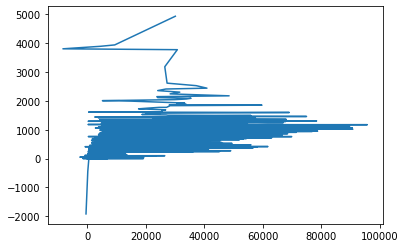

In [10]:
plt.plot(df['cases'], df['deaths'])

In [11]:
turkey.shape

(181, 5)

In [12]:
turCases = turkey['cases'].iloc[:20]
turDeaths = turkey['deaths'].iloc[:20]
turDensity = turkey['densityPop'].iloc[:20]
fraCases = france['cases'].iloc[:20]
fraDeaths = france['deaths'].iloc[:20]
fraDensity = france['densityPop'].iloc[:20]
polCases = polland['cases'].iloc[:20]
polDeaths = polland['deaths'].iloc[:20]
polDensity = polland['densityPop'].iloc[:20]

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


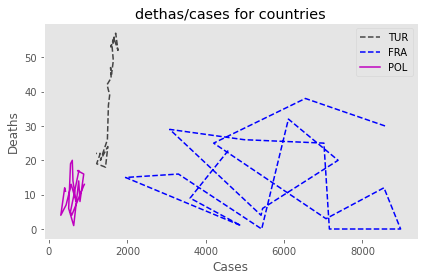

In [13]:
print(plt.style.available)
plt.style.use('ggplot')

plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.title('dethas/cases for countries')
plt.plot(turCases, turDeaths, color='#444444',linestyle='--',label='TUR')
plt.plot(fraCases, fraDeaths, color='b',linestyle='--',label='FRA')
plt.plot(polCases, polDeaths, color='m',linestyle='-',label='POL')
plt.tight_layout()
plt.grid()
plt.savefig('plot.png')
plt.legend()

BAR CHART FROM CSV

In [14]:
x_indexes = np.arange(1,21)
x_indexes = x_indexes[::-1]
x_indexes.shape
width = 0.25

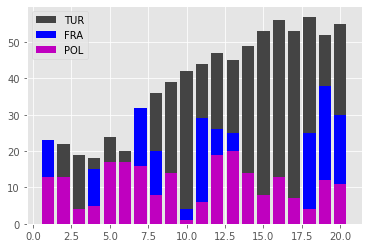

In [15]:
plt.bar(x_indexes, turDeaths,color='#444444', label='TUR')
plt.bar(x_indexes, fraDeaths, color='b',linestyle='--',label='FRA')
plt.bar(x_indexes, polDeaths, color='m',linestyle='-',label='POL')
plt.legend()

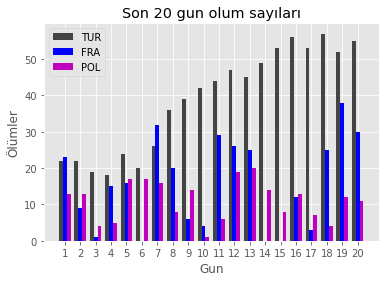

In [16]:
plt.bar(x_indexes - width, turDeaths,color='#444444',width=width, label='TUR')
plt.bar(x_indexes, fraDeaths, color='b',linestyle='--',width=width,label='FRA')
plt.bar(x_indexes + width, polDeaths, color='m',linestyle='-',width=width,label='POL')
plt.title('Son 20 gun olum sayıları')
plt.xlabel('Gun')
plt.ylabel('Ölümler')
plt.xticks(ticks = x_indexes)
plt.legend()

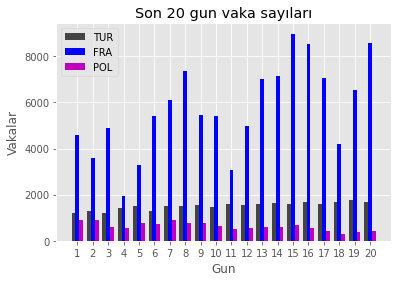

In [17]:
plt.bar(x_indexes - width, turCases,color='#444444',width=width, label='TUR')
plt.bar(x_indexes, fraCases, color='b',linestyle='--',width=width,label='FRA')
plt.bar(x_indexes + width, polCases, color='m',linestyle='-',width=width,label='POL')
plt.title('Son 20 gun vaka sayıları')
plt.xlabel('Gun')
plt.ylabel('Vakalar')
plt.xticks(ticks = x_indexes)
plt.legend()

([<matplotlib.patches.Wedge at 0x7f2261f55f10>,
 [Text(0.33991867422268784, 1.0461621742897658, 'Sixty'),
  Text(-1.0759623422495033, -0.228702947206552, 'Fourty'),
  Text(0.11498145640393657, -1.0939740694747888, 'e1'),
  Text(1.004900077411765, -0.44741014116560773, 'e2')])

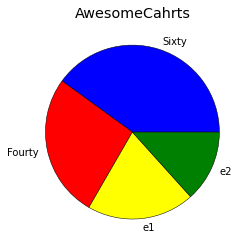

In [18]:
plt.figure()
slices = [60,40,30,20]
labels = ['Sixty', 'Fourty','e1','e2']
colors = ['blue', 'red','yellow','green']
plt.title('AwesomeCahrts')
plt.pie(slices, labels = labels,colors = colors, wedgeprops={'edgecolor':'black'})

([<matplotlib.patches.Wedge at 0x7f2261f26b80>,
 [Text(-0.3148307570564292, 1.0539836784368513, 'TUR'),
  Text(-0.3091384035326, -1.2627087738118064, 'FRA'),
  Text(1.0351452811754205, -0.6070207960690143, 'POL')],
 [Text(-0.171725867485325, 0.5749001882382825, '59.2%'),
  Text(-0.1902390175585231, -0.7770515531149578, '23.9%'),
  Text(0.6038347473523287, -0.35409546437359163, '16.9%')])

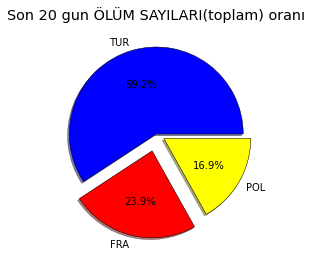

In [19]:
plt.figure()
slices = [turDeaths.sum(),fraDeaths.sum(),polDeaths.sum()]
labels = ['TUR', 'FRA','POL']
colors = ['blue', 'red','yellow']
plt.title('Son 20 gun ÖLÜM SAYILARI(toplam) oranı')
plt.pie(slices, labels = labels,colors = colors, explode = [0,0.2,0.1],autopct='%1.1f%%',shadow=True, wedgeprops={'edgecolor':'black'})

([<matplotlib.patches.Wedge at 0x7f2261e850a0>,
 [Text(0.903066868662035, 0.6280686512833984, 'TUR'),
  Text(-1.2182034491750515, -0.4538505882093882, 'FRA'),
  Text(1.3561090301583842, -0.3478049716764937, 'POL')],
 [Text(0.4925819283611099, 0.34258290070003544, '19.3%'),
  Text(-0.749663661030801, -0.2792926696673158, '72.7%'),
  Text(0.8717843765303899, -0.2235889103634602, '8.0%')])

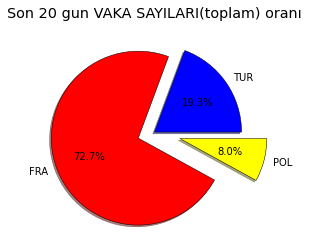

In [20]:
plt.figure()
slices = [turCases.sum(),fraCases.sum(),polCases.sum()]
labels = ['TUR', 'FRA','POL']
colors = ['blue', 'red','yellow']
explode= [0,0.2,0.3]
plt.title('Son 20 gun VAKA SAYILARI(toplam) oranı')
plt.pie(slices, labels = labels,colors = colors, explode=explode,shadow=True, autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})

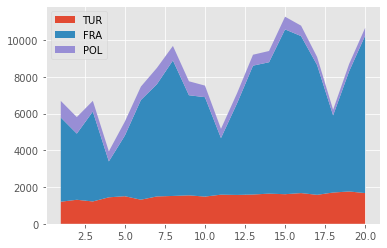

In [21]:
plt.figure()
slices = [turCases.sum(),fraCases.sum(),polCases.sum()]
labels=['TUR', 'FRA','POL']
plt.stackplot(x_indexes, turCases,fraCases,polCases, labels=labels)
plt.legend(loc='upper left')

Overal median deaths value: 23.666666666666668


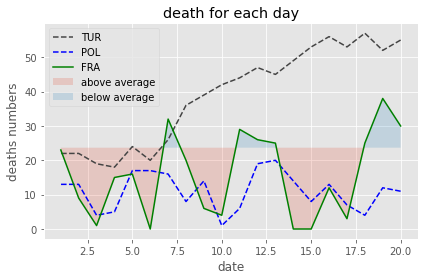

In [22]:
overal_median_deaths = (turDeaths.median() + polDeaths.median() + fraDeaths.median()) / 3

plt.figure()
plt.xlabel('date')
plt.ylabel('deaths numbers')
plt.title('death for each day')
plt.plot(x_indexes, turDeaths, color='#444444', linestyle='--', label='TUR')
plt.plot(x_indexes, polDeaths, color='b', linestyle='--', label='POL')
plt.plot(x_indexes, fraDeaths, color='g', linestyle='-', label='FRA')
plt.tight_layout()
plt.fill_between(x_indexes, fraDeaths, overal_median_deaths, 
                 where=(fraDeaths < overal_median_deaths),
                 interpolate=True,
                 alpha=0.2, label='above average')
plt.fill_between(x_indexes, fraDeaths, overal_median_deaths, 
                 where=(fraDeaths > overal_median_deaths),
                 interpolate=True,
                 alpha=0.2, label='below average')
plt.legend()
print('Overal median deaths value:', overal_median_deaths)

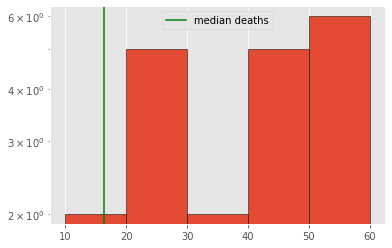

In [23]:
bins=[x*10 for x in range(1,7)]
plt.hist(turDeaths, bins=bins, edgecolor='black', log=True)

median_deaths = 16.3

plt.axvline(median_deaths, color='g', label='median deaths')
plt.legend()

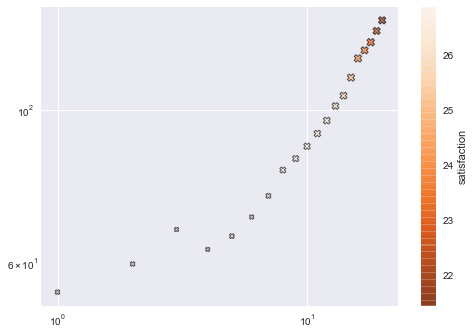

In [24]:
plt.style.use('seaborn')
plt.figure()
plt.scatter(x_indexes, fraDensity, s=turDeaths, c=polDensity, 
            cmap='Oranges_r', marker='X', edgecolor='black', 
            linewidth=1, alpha=0.65)
plt.xscale('log')
plt.yscale('log')

cbar = plt.colorbar()
cbar.set_label('satisfaction')

In [28]:
from matplotlib import dates as mpl_dates
plt.style.use('seaborn')
plt.tight_layout()

<Figure size 576x396 with 0 Axes>

In [27]:
turkey

,dateRep,countryterritoryCode,cases,deaths,densityPop
38594,10/09/2020,TUR,1673,55,27.359680
38595,09/09/2020,TUR,1761,52,26.920677
38596,08/09/2020,TUR,1703,57,26.604838
38597,07/09/2020,TUR,1578,53,26.287780
38598,06/09/2020,TUR,1673,56,25.847557
...,...,...,...,...,...
38770,18/03/2020,TUR,51,0,NaN
38771,17/03/2020,TUR,29,0,NaN
38772,16/03/2020,TUR,16,0,NaN
38773,13/03/2020,TUR,1,0,NaN


In [30]:
turkey.dtypes

dateRep                  object
countryterritoryCode     object
cases                     int64
deaths                    int64
densityPop              float64
dtype: object

In [31]:
turkey["dateRep"] = pd.to_datetime(turkey["dateRep"])

<ipython-input-31-3ffea4032ce6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkey["dateRep"] = pd.to_datetime(turkey["dateRep"])


In [47]:
turkey.dtypes  #DAteTime ploting
turkey.sort_values(by='dateRep', inplace=True)

<ipython-input-47-c2790e61adbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkey.sort_values(by='dateRep', inplace=True)


AttributeError: module 'matplotlib.pyplot' has no attribute 'figsize'

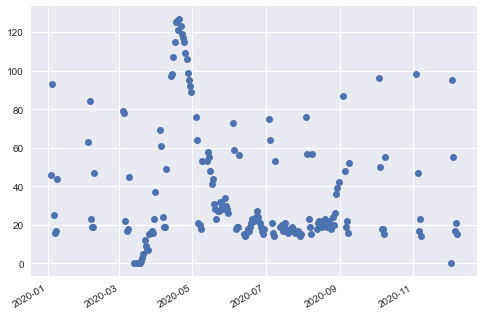

In [48]:
plt.plot_date(turkey["dateRep"], turkey["deaths"])  #, linestyle='solid'
plt.gcf().autofmt_xdate()
#plt.figsize(500,500)  #plt.figure(figsize=(500,500))
date_format = mpl_dates.DateFormatter('%b, %d %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xlabel('Deaths')
plt.ylabel('Date Representation')
plt.title('Turkey deaths ratio for date')
plt.legend()

In [49]:
from itertools import count

In [55]:
x = []
y = []
index = count()
def animate(i):
    x.append(next(index))
    y.append(random.randint(0,5))
    
    plt.cla()
    plt.plot(x, y)

In [56]:
plt.style.use('fivethirtyeight')
from matplotlib.animation import FuncAnimation

In [57]:
ani = FuncAnimation(plt.gcf(), animate, interval=1000)
plt.show()

<Figure size 576x396 with 0 Axes>

In [62]:
plt.figure()

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

Text(0, 0.5, 'Date')

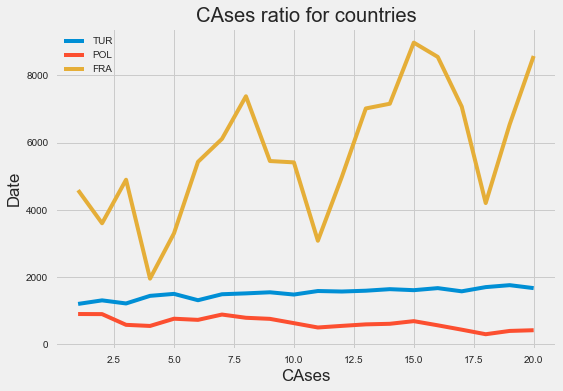

In [67]:
fig, ax = plt.subplots()
ax.plot(x_indexes, turCases, label='TUR')
ax.plot(x_indexes, polCases, label='POL')
ax.plot(x_indexes, fraCases, label='FRA')
ax.legend()
ax.set_title('CAses ratio for countries')
ax.set_xlabel('CAses')
ax.set_ylabel('Date')

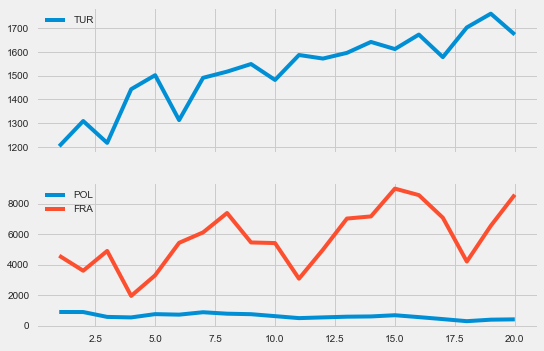

In [78]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False)
ax1.plot(x_indexes, turCases, label='TUR')
ax2.plot(x_indexes, polCases, label='POL')
ax2.plot(x_indexes, fraCases, label='FRA')
ax2.legend()
ax1.legend()